# Проверка гипотез для увеличения выручки  (исследование для крупного интернет-магазина)

## Введение
<b> Краткое описание проекта: </b>

<b> Цель проекта: </b> Проверить ряд гипотез с целью увеличения выручки интернет-магазина. 

Исходной информацией служит файл с выдвинутыми гипотезами и файлы с заказами и результатми А/В тестов.

<b> Описание данных: </b>


<b> В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:</b> 

`Hypothesis` — краткое описание гипотезы;

`Reach`- охват пользователей по 10-балльной шкале;

`Impact`- влияние на пользователей по 10-балльной шкале;

`Confidence` - уверенность в гипотезе по 10-балльной шкале;

`Effort` - затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


<b> Файл `orders.csv` содержит: </b> 

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.


<b> Файл `visitors.csv` содержит:</b> 

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

<b>План работы: </b> <a id="cell0"></a>

[<b>1. Загрузка и подготовка данных к анализу.</b>](#cell1)
    
[<b>2. Приоритизация гипотез.</b>](#cell2)

 - Применение фреймворков ICE и RICE для приоритизации гипотез. 
 - Объяснение изменения приоритизации гипотез при применении RICE вместо ICE. Причина.
    
[<b>3. Анализ A/B-теста.</b>](#cell3)

 - График кумулятивной выручки по группам. Выводы и предположения.
 - График кумулятивного среднего чека по группам. Выводы и предположения.
 - График относительного изменения кумулятивного среднего чека группы B к группе A.Выводы и предположения.
 - График кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения.
 - График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения.
 - Точечный график количества заказов по пользователям. Выводы и предположения.
 - Расчет 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.
 - Точечный график стоимостей заказов. Выводы и предположения.
 - Расчет 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.
 - Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения.
 - Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
 - Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения.
 - Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
 - Принятие решения по результатам теста, объяснение. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.
   
[<b>4. Общий вывод  </b>](#cell4)


### 1. Загрузка данных и подготовка их к анализу <a id="cell1"></a> </a> <font size = 2>[к оглавлению](#cell0)</font>

In [1]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# зададим параметр, чтоб содержимое строк датасетов отображалось полностью
pd.set_option('display.max_colwidth', None) 

In [3]:
# Загрузим данные в переменные
hypothesis = pd.read_csv('hypothesis.csv') # гипотезы
orders = pd.read_csv('orders.csv') # заказы
visitors = pd.read_csv('visitors.csv') # группы А/В теста

**Посмотрим данные о гипотезах (hypothesis)**

In [4]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# основная информация
hypothesis.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# преобразование названий стоблцов в стиле snake case
hypothesis.columns = hypothesis.columns.str.lower() 

**Посмотрим данные о заказах (orders)**

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
# основная информация
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
# проверим наличие дубликатов
orders.duplicated().sum()

0

В датасете отсутсвуют пропуски и явные дубликаты

In [10]:
# приведем тип данных даты к date и поправим названия колонок на более стилистически верные
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True ) 
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
orders.info() # Проверим, что преобразования сделаны верно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**Посмотрим данные о группах А/В (visitors)**

In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
# основная информация
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
# проверим наличие дубликатов
visitors.duplicated().sum()

0

В датасете `visitors` отсутсвуют пропуски и явные дубликаты

In [15]:
# приведем тип данных даты к date 
visitors['date'] = pd.to_datetime(visitors['date'])

In [16]:
visitors.info() # Проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим, что в А/В тесте две группы

In [17]:
visitors['group'].unique()# находим уникальные группы

array(['A', 'B'], dtype=object)

Посмотрим на временной интервал проведения теста: найдем даты начала и окончания.

In [18]:
print('Дата начала теста', visitors['date'].min().date())
print('Дата окончания теста', visitors['date'].max().date())

Дата начала теста 2019-08-01
Дата окончания теста 2019-08-31


Найдем количество пользователей в каждой группе

In [19]:
orders.groupby('group', as_index=False).agg({'visitor_id': 'nunique'})


,group,visitor_id
0,A,503
1,B,586


Посмотрим динамику посетителей по дням по группам

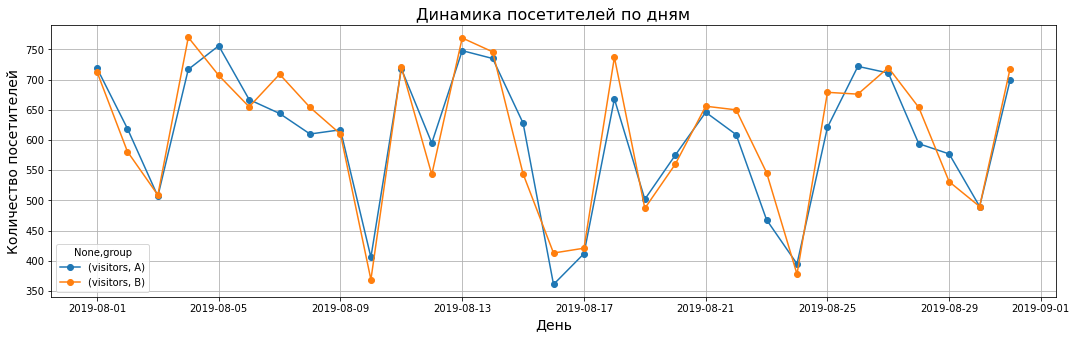

In [20]:
visitors_day = visitors.pivot_table(index='date', columns='group', aggfunc = 'sum').reset_index()
visitors_day['date'] = visitors_day['date'].dt.date
visitors_day = visitors_day.set_index('date')
visitors_day.plot(grid = True, figsize =(18,5),  style = 'o-')
plt.title('Динамика посетителей по дням', size = 16)
plt.ylabel('Количество посетителей', size = 14)
plt.xlabel('День', size = 14)
plt.show()

**Общий вывод по загрузке данных и подготовке их к анализу**
Данные хорошего качества, без пропусков и дубликатов. Было произведено приведение дат к типу date,а также названия колонок приведены к более стилистически верному виду.

Проверено, что групп в А/В тесте действительно две.

Тест проходил в течение одного месяца.

Количество посетителей в группах составляет соответственно А - 503, B - 586. 

Динамика посетителей по дням в разных группах меняется почти по одинаковой кривой.


### 2. Приоритизация гипотез. <a id="cell2"></a> </a> <font size = 2>[к оглавлению](#cell0)</font>

Для приоритизации гипотез применим фреймворки ICE и RICE

In [21]:
#Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

hypothesis['ICE'] =  round(hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts'],2)
display(hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending =False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [22]:
#Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод по приоритизации гипотез.** При применении фреймворков RICE и ICE наблюдается схожая картина, когда 5 гипотез с наибольшим приоритетом значительно операжают оставшиеся 4.  При этом эти гипотезы совпадают, только отличается их порядок. При использовании RICE на первое место выходят гипотезы, которые дают наибольший охват в текущем моменте. В лидерах следующие гипотезы (в порядке убывания приоритета):
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	

- Запустить акцию, дающую скидку на товар в день рождения	

Для дальнейшего анализа возьмем первую по приоритету гипотезу: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### 3. Анализ A/B-теста  <a id="cell3"></a> </a> <font size = 2>[к оглавлению](#cell0)</font>

In [23]:
# Прoверим корректность формирования групп для теста, посмотрим не попали ли одни и теже пользователи в обе группы
len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique()))

58

**Одни и теже пользователи попали в обе группы, вероятно произошла ошибка в сборе данных. Однако удалить этих пользователей мы можем только из таблицы с заказами, т.к. в таблице с визитами у нас хранятся уже агрегированные данные по дням. В идеале нужно либо сформирвоать заново таблицу с визитами, либо проводить тест заново. Однако в нашем случае это не возможно, поэтому продолжим анализ теста.**

In [24]:
# создадим массив уникальных пар значений дат и групп теста, удалим дубликаты
datesGroups = orders[['date','group']].drop_duplicates()

# получим агрегированные кумулятивные данные по дням о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получим агрегированные кумулятивные данные по дням о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [25]:
# Проверим корректно ли был содан датафрейм cummulativeData,
# совпадают ли min и max даты в этом датафрейме с min и max датой в исходных данных
if cumulativeData['date'].min().date()==visitors['date'].min().date():
    mini = "совпадает"
else:
    mini = "не совпадает"
if cumulativeData['date'].max().date()==visitors['date'].max().date():
    maxi = "совпадает"
else:
    maxi = "не совпадает"    
print('Дата начала теста', cumulativeData['date'].min().date(), mini)
print('Дата окончания теста', cumulativeData['date'].max().date(), maxi)

Дата начала теста 2019-08-01 совпадает
Дата окончания теста 2019-08-31 совпадает


<b> 3.1. Построим график кумулятивной выручки по группам.</b>

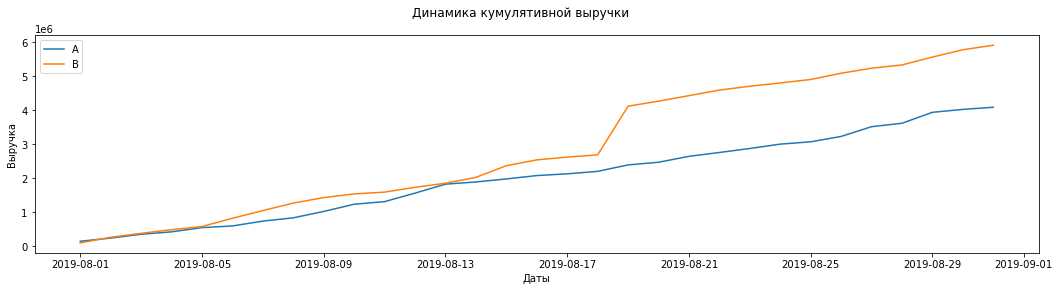

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(18, 4))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.suptitle('Динамика кумулятивной выручки')
plt.ylabel('Выручка')
plt.xlabel('Даты')

plt.legend() 
plt.show()


**В группах А и В размер выручки увеличивается одинаково до 18 августа. С 19 августа наблюдается существенный отрыв группы В, который может быть обусловлен либо единичными дорогими заказами либо единовременным ростом числа заказов группы В**

**3.2. Построим график кумулятивного среднего чека по группам**

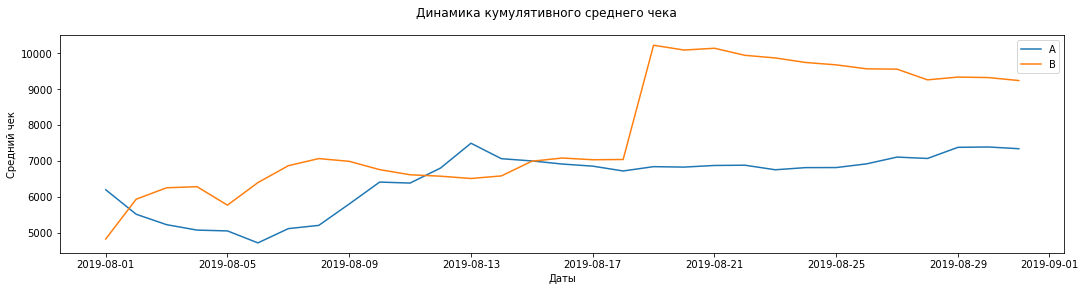

In [27]:
plt.figure(figsize=(18, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.suptitle('Динамика кумулятивного среднего чека')
plt.ylabel('Средний чек')
plt.xlabel('Даты')

plt.legend() 
plt.show()

**Кумулятивный средний чек группы В существенно увеличивается 19 августа, что свидетельствует о единичных дорогих заказаx**

**3.3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A** 

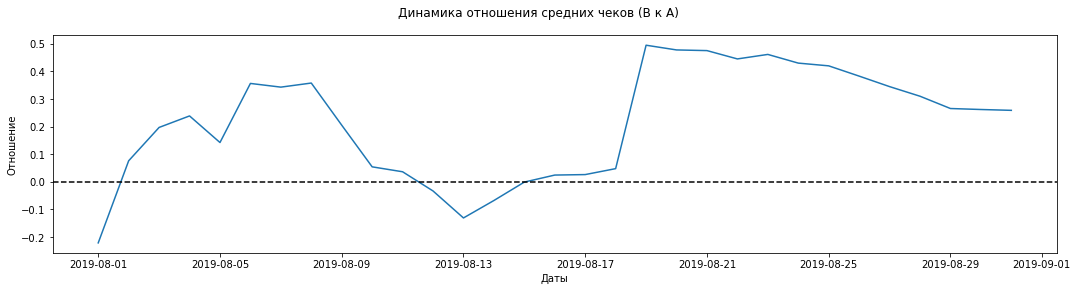

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(18, 4))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.suptitle('Динамика отношения средних чеков (В к А)')
plt.xlabel('Даты')
plt.ylabel('Отношение')
plt.show()

**В динамике видно резкие скачки в отношении средних чеков, что свидетельсвует о наличии аномальных значений. Средний чек группы В в большинстве случаев существенно выше среднего чека группы А**

**3.4. Построим график кумулятивного среднего количества заказов на посетителя по группам**

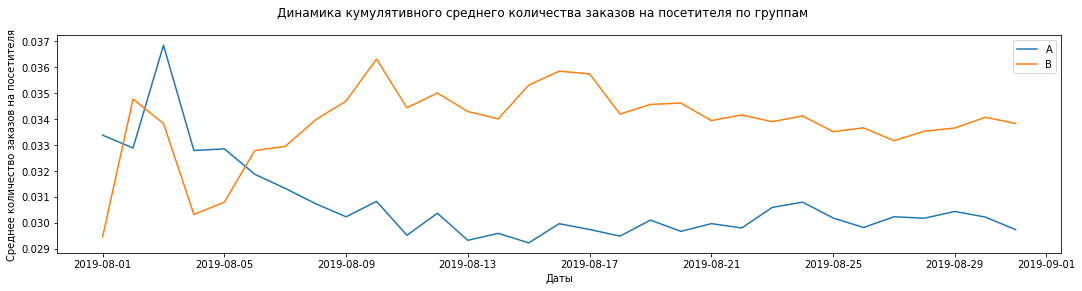

In [29]:
# считаем кумулятивное среднее количество заказов на одного посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(18, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.suptitle('Динамика кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel('Даты')
plt.legend()
plt.show()

**Кумулятивное среднее количество заказов на посетителя в группе В выше чем в группе А стабильно начиная с 6 августа**

**3.5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

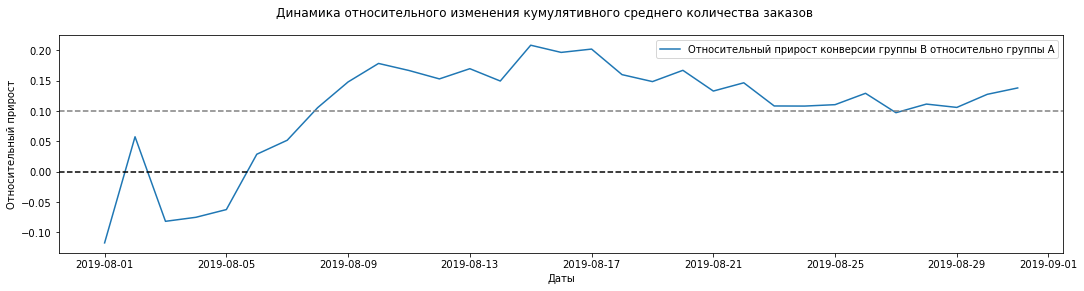

In [30]:
# Объединим датафреймы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],\
                                                                           left_on='date',\
                                                                           right_on='date',\
                                                                           how='left',\
                                                                           suffixes=['A', 'B'])

plt.figure(figsize=(18, 4))
plt.plot(mergedCumulativeConversions['date'],\
         mergedCumulativeConversions['conversionB']/\
         mergedCumulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.suptitle('Динамика относительного изменения кумулятивного среднего количества заказов')
plt.xlabel('Даты')
plt.ylabel('Относительный прирост')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.show()

**Кумулятивное среднее группы В относительно группы А стало больше начиная с 6 августа, однако отношение не стабильно, сначала растет, затем немного снижается, но все равно остается больше в группе В.**

**3.6. Построим точечный график количества заказов по пользователям**

In [31]:
# найдем число заказов по пользователям, создадим датафрейм ordersByUsers c двумя столбцами: 'visitorId' и 'orders'
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']


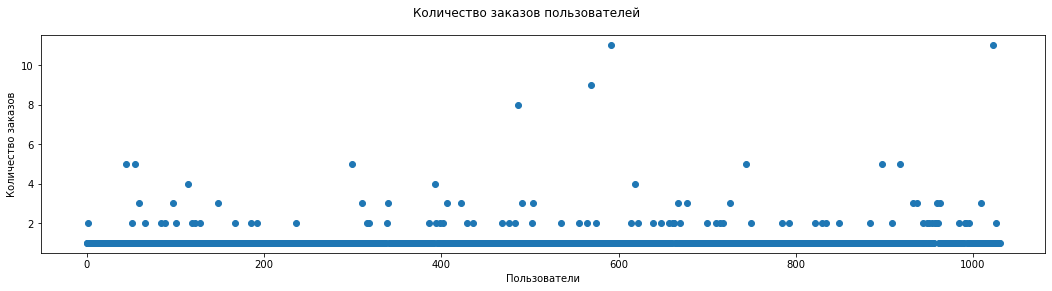

In [32]:
# построим точечный график количества заказов по пользователям
x_values = pd.Series(range(0,len(ordersByUsers)))# в прекоде сгенерированны номера наблюдений
plt.figure(figsize=(18, 4))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.suptitle('Количество заказов пользователей')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show()

**Из графика видно, что обычно пользователи совершают до 2 заказов включительно**

**3.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей**

In [33]:
print('95-й и 99-й перцентили количества заказов на пользователя составляют соответственно:',\
      np.percentile(ordersByUsers['orders'], [95, 99])) 

95-й и 99-й перцентили количества заказов на пользователя составляют соответственно: [2. 4.]


**Не более 95% пользователей оформляют 2 и менее заказов, и порядка 1% пользователей оформляют более 4 заказов. Разумно выбрать 4 заказа на 1 пользователя за верхнюю границу, а остальных отсеять как аномальные**

**3.8. Построим точечный график стоимостей заказов**

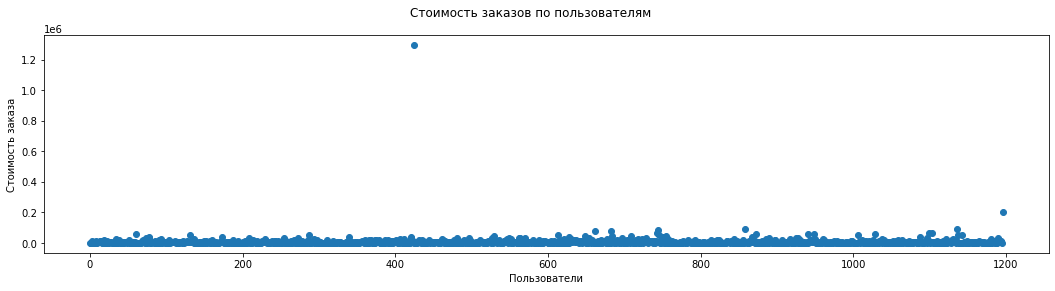

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(18, 4))
plt.scatter(x_values, orders['revenue'])
plt.suptitle('Стоимость заказов по пользователям')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
# plt.ylim(0, 0.2)
plt.show()

**На графике видны два значительных выброса - заказы с суммой более 1.2 млн руб и 200 тыс. руб.**

**Oграничим значения по оси Y. Чтобы двух явных выбросов не было видно и рассмотрим основную часть заказов.**

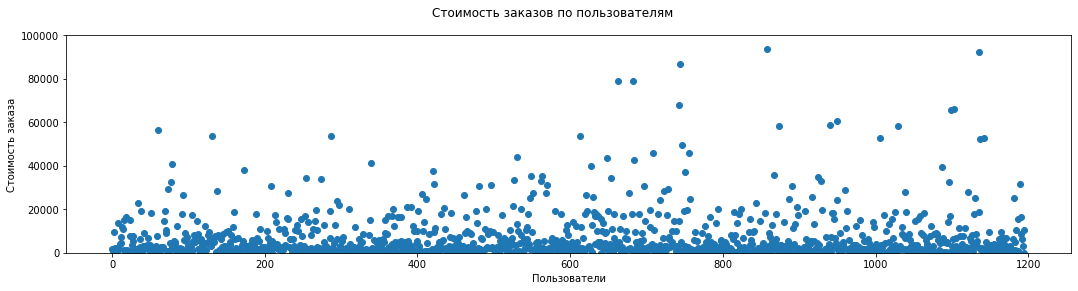

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(18, 4))
plt.scatter(x_values, orders['revenue'])
plt.suptitle('Стоимость заказов по пользователям')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи') 
plt.ylim(0, 100000)# ограничение по Y
plt.show()

**Основная масса заказов имеет сумму до 10 тыс.руб.**

**3.9. Посчитатаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей**

In [36]:
print('95-й и 99-й перцентили стоимости заказов составляют соответственно:', np.percentile(orders['revenue'], [95, 99])) 

95-й и 99-й перцентили стоимости заказов составляют соответственно: [28000.  58233.2]


**Не более 95% пользователей оформляют заказы стоимостью до 28 тыс, и порядка 1% пользователей оформляют заказы стоимостью более 58 тыс. Разумно выбрать 99% перцентиль (58233)  за верхнюю границу, а остальные отсеять как аномальные**

**3.10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

Сформулируем гипотезы. 

`H0 Нулевая`: различий в среднем количестве заказов между группами нет. 

`H1 Альтернативная`: различия в среднем количестве заказов между группами есть.

При проверке гипотез будем применять непараметрический тест Уилкоксона-Манна-Уитни, так как нами зафиксированы выбросы, а данный метод как раз подходит при их наличии. Уровень alpha зададим в размере 0.05

In [37]:
alpha = 0.05
# Cоздадим переменные ordersByUsersA и ordersByUsersB со столбцами 'user_id' и 'orders'.
# Для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = ((orders[orders['group'] == 'A']
                   .groupby('visitor_id', as_index=False)
                   .agg({'transaction_id': pd.Series.nunique}))
                 )
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = ((orders[orders['group'] == 'B']
                   .groupby('visitor_id', as_index=False)
                   .agg({'transaction_id': pd.Series.nunique}))
                 )
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. 
# А пользователям без заказов — нули

sampleA = (pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].
                                                        sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
          )

sampleB = (pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors']
                                                        .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
          )

results = stats.mannwhitneyu(sampleA, sampleB)

print('Среднее количество заказов группе В больше среднего группы А на',"{0:.1f}".format((sampleB.mean() / sampleA.mean() - 1)*100), '%')

print('p-значение: ', "{0:.3f}".format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 


Среднее количество заказов группе В больше среднего группы А на 13.8 %
p-значение:  0.017
Отвергаем нулевую гипотезу: разница статистически значима


**3.11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

Сформулируем гипотезы. 

`H0 Нулевая`: различий в среднем чеке заказов между группами нет. 

`H1 Альтернативная`: различия в среднем чеке заказов между группами есть.

In [38]:
results = (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue']))

print('Среднее количество заказов группе В больше среднего группы А на ',\
       "{0:.1f}".format((orders[orders['group']=='B']['revenue'].mean()/\
                         orders[orders['group']=='A']['revenue'].mean()-1)*100), '%')
                                                                                          
print('p-значение: ', "{0:.3f}".format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 


Среднее количество заказов группе В больше среднего группы А на  25.9 %
p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**3.12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [39]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'],99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Всего аномальных пользователей', abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
Всего аномальных пользователей 15


Подготовим выборки количества заказов по пользователям по группам теста без аномальных заказов

In [40]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),name='orders',),],axis=0,)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),name='orders',),],axis=0,)

Сформулируем гипотезы. 

`H0 Нулевая`: различий в среднем количестве заказов между группами нет. 

`H1 Альтернативная`: различия в среднем количестве заказов между группами есть.

In [41]:
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('Среднее количество заказов группе В больше среднего группы А на ',\
      "{0:.1f}".format((sampleBFiltered.mean()/sampleAFiltered.mean()-1)*100), '%')

print('p-значение: ', "{0:.3f}".format(results.pvalue)) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 


Среднее количество заказов группе В больше среднего группы А на  15.3 %
p-значение:  0.014
Отвергаем нулевую гипотезу: разница статистически значима


**3.13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

Сформулируем гипотезы. 

`H0 Нулевая`: различий в среднем чеке заказов между группами нет. 

`H1 Альтернативная`: различия в среднем чеке между группами есть.

In [42]:
results = (stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],))

print(('Среднее количество заказов группе В меньше среднего группы А на ' "{0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',
                          np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )]['revenue'].mean()- 1)) )
print('p-значение: ', "{0:.3f}".format(results.pvalue)) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 


Среднее количество заказов группе В меньше среднего группы А на -0.006
p-значение:  0.851
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**3.14. Принять решение по результатам теста и объяснить его** 

Варианты решений:

    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест

**С учетом полученных данных разумнее всего остановить тест, зафиксировав наличие значимых отличий между группами. В группе В статистически значимо большее количество заказов относительно группы А, как по сырым, так и по очищенным данным. 
Статичтически значимых отличий по сумме заказов между тестовыми группами не выявлено.**

**В соотвествии с этим рекомендуется реализация изменений по проверяемой гипотезе: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**

### 4. Общие выводы <a id="cell4"></a> </a> <font size = 2>[к оглавлению](#cell0)</font>

#### В рамках исследования для крупного интернет-магазина мы провели анализ гипотез, направленных на увеличение выручки.

Данные были загружены, проверены на наличие пропусков и дубликатов. Для дальнейшего анализа были приведены в соответсвие типы данных и стилистическая обработка названий параметров.

Была проведена приоретизация гипотез, в результате которой была выбрана следующая: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

В рамках анализа групп А/В теста было выявлено наличие пересеченйи по группам. В связи с этим к результатам исследования стоит отнестись осторожно, либо при возможности и наличии ресурсов - повторить с более корректной процедурой разбиения по группам.

При анализе данных о количестве заказов, а также сумм заказов было выявлено наличие аномальных значений.

При проведении статистического анализа с использванием непараметрического теста Уилкоксона-Манна-Уитни, который позволяет проводить анализ при наличии выбросов. На основе сырых данных были установлены статистические различия между группами по количеству заказов, а различий в суммах заказов не выявлено. 

После удаления аномальных пользователей (с количеством заказов более 4, либо с суммой заказов более 58 тыс.) статистически значимые различия между группами по количеству заказов сохранились. По сырым и очищенным данным не были выявлены статистически значимые различия по суммам заказов.

В качестве рекомендаций было предложено остановить тест, т.к. выявлены значимые различий между группами. С целью увеличения прибыли необходима реализация изменений: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.